<a href="https://colab.research.google.com/github/Farah14-lab/PCVK_Genap_2023/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

**Transformasi Linier Brightness**

Formula: g(x, y) = f(x, y) + b


Mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan: 60


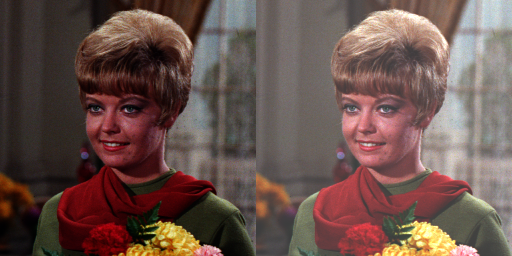

In [19]:
print('Mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/imanges/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

**TUGAS**


**1. Implementasikan inverse citra**

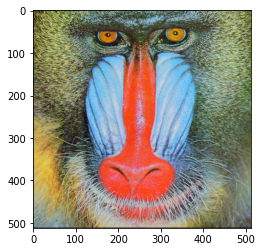

In [27]:
img = cv.imread('/content/drive/MyDrive/PCVK/imanges/mandrill.tiff')
img_rgb = cv.cvtColor(img,cv.COLOR_BGR2RGB) # konversi channel BGR -> RGB
plt.imshow(img_rgb)

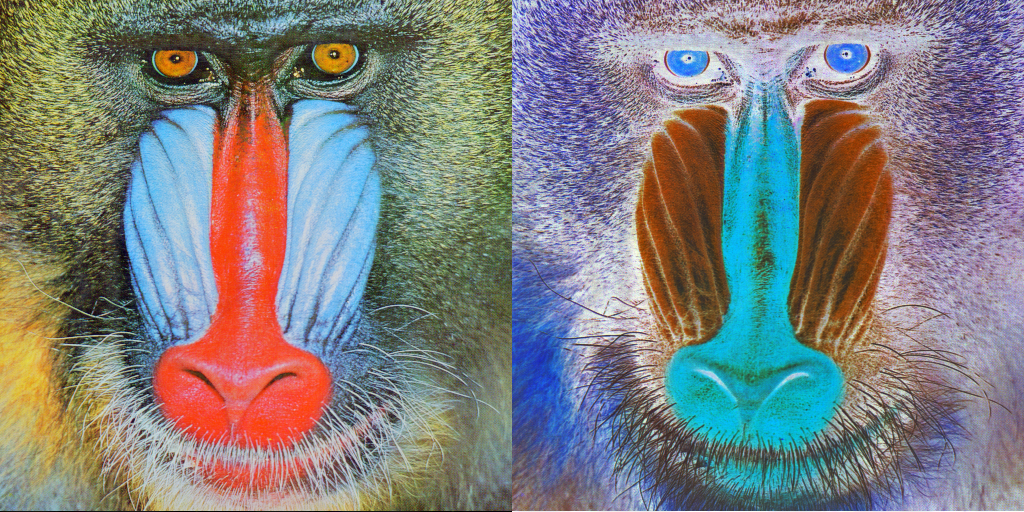

In [28]:
img2 = 255 - img
img2 = cv.hconcat((img, img2))
cv2_imshow(img2)

**2. Transformasi Contrast**

Formula: g(x, y) = a ∗ f(x, y) + b 

Mengubah kontras dan tingkat kecerahan citra
--------------------------------------------
Masukkan nilai kecerahan [-255 - 255]: 60
Masukkan nilai kontras [1.0 - 3.0]: 1.6


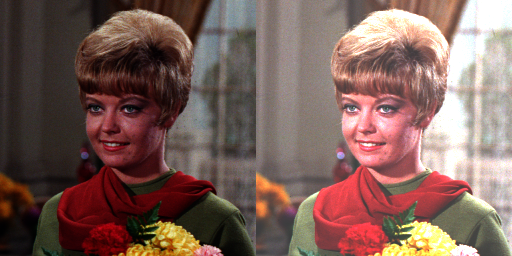

In [20]:
print('Mengubah kontras dan tingkat kecerahan citra')
print('--------------------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan [-255 - 255]: '))
  contrast = float(input('Masukkan nilai kontras [1.0 - 3.0]: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/imanges/female.tiff')
brightnessContrast_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightnessContrast_image[y,x,c] = np.clip(contrast * original[y,x,c] + brightness, 0, 255)

#cara simple tanpa for loop
#brightnessContrast_image = cv.convertScaleAbs(original, alpha=contrast, beta=brightness)

final_frame = cv.hconcat((original, brightnessContrast_image))
cv2_imshow(final_frame)

**3. Transformasi Logarithmic Brightness**

Formula: s = c ∗ log(1 + r)

 Mengubah tingkat kecerahan citra dengan Transformasi Log 
----------------------------------------------------------
Masukan nilai kecerahan: 35


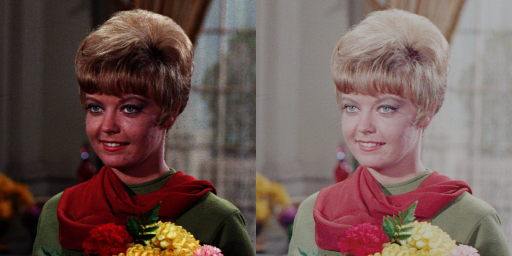

In [21]:
print(' Mengubah tingkat kecerahan citra dengan Transformasi Log ')
print('----------------------------------------------------------')

try:
  brightness = int(input('Masukan nilai kecerahan: '))
except ValueError:
  input('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/imanges/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(brightness * (np.log(1 + original[y,x,c])), 0 , 255)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

**Implementasikan transformasi grayscale menggunakan metode averaging, lightness, dan luminance**


**4. a. Averaging Method**

Formula: Grayscale AVG = (R + G + B) / 3

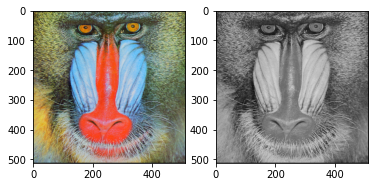

In [25]:
img_avg = cv.imread('/content/drive/MyDrive/PCVK/imanges/mandrill.tiff')
img_avg[:] = img_avg.mean(axis=-1, keepdims=10)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(img_avg)

**4. b. Lightness Method**

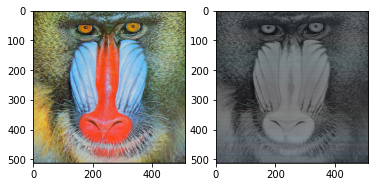

In [31]:
img_light = cv.imread('/content/drive/MyDrive/PCVK/imanges/mandrill.tiff')
img_light[:] = np.max(img_light,axis=-1, keepdims=100)/2 + np.min(img_light,axis=-2, keepdims=100)/3
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(img_light)

**4. b. Luminance Method**

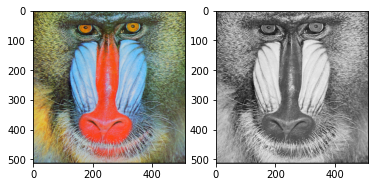

In [32]:
img_lumnc = cv.imread('/content/drive/MyDrive/PCVK/imanges/mandrill.tiff')
R, G, B = img_lumnc[:,:,0], img_lumnc[:,:,1], img_lumnc[:,:,2]
gray_img_lumnc = (0.21 * R) + (0.72 * G) + (0.07 * B)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(gray_img_lumnc, cmap='gray')

**5. Tampilkan warna tertentu pada Image dan ubah warna lain menjadi grayscale**

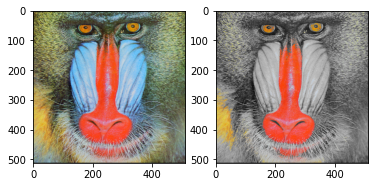

In [44]:
img_3 = cv.imread('/content/drive/MyDrive/PCVK/imanges/mandrill.tiff')
ret, mask = cv.threshold(img_3[:,:,2], 190, 255, cv.THRESH_BINARY)
mask3 = np.zeros_like(img_3)
mask3[:,:,0] = mask
mask3[:,:,1] = mask
mask3[:,:,2] = mask

red = cv.bitwise_and(img_rgb, mask3)

gray = cv.cvtColor(img_3, cv.COLOR_BGR2GRAY)
img_4 = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)
gray = cv.bitwise_and(img_4, 255 - mask3)
out = gray + red
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(out, cmap='gray')